In [17]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(r"train.csv")

In [5]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [6]:
df['class']=df['class'].map({'e':0,'p':1})

In [7]:
df['class'].unique()

array([0, 1], dtype=int64)

In [8]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,0,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,1,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,0,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,0,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,0,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [9]:
df.shape

(3116945, 22)

In [10]:
df.nunique()

id                      3116945
class                         2
cap-diameter               3913
cap-shape                    74
cap-surface                  83
cap-color                    78
does-bruise-or-bleed         26
gill-attachment              78
gill-spacing                 48
gill-color                   63
stem-height                2749
stem-width                 5836
stem-root                    38
stem-surface                 60
stem-color                   59
veil-type                    22
veil-color                   24
has-ring                     23
ring-type                    40
spore-print-color            32
habitat                      52
season                        4
dtype: int64

In [11]:
df.dtypes

id                        int64
class                     int64
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [12]:
df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [13]:
def replace_non_alpha_with_nan(df):
    # Get columns with dtype 'object'
    object_columns = [col for col in df.columns if df[col].dtype == 'object']
    
    # Define a list of alphabetic characters (lowercase)
    alphabet_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    
    # Function to check if a value is a single alphabetic character
    def filter_alpha(value):
        if isinstance(value, str):
            # Check if the value is a single alphabetic character and in alphabet_list
            return value if len(value) == 1 and value in alphabet_list else np.nan
        return np.nan

    # Apply the function to each object column
    for col in object_columns:
        df[col] = df[col].apply(filter_alpha)
    
    return df

In [18]:
df = replace_non_alpha_with_nan(df)


In [19]:

def grab_col_names(dataframe, cat_th=10, car_th=30):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 3116945
Variables: 22
cat_cols: 18
num_cols: 4
cat_but_car: 0
num_but_cat: 1


In [20]:
cat_cols = [col for col in cat_cols if col not in ["class"]]
num_cols = [col for col in num_cols if col not in ["id"]]

In [23]:
import seaborn as sns 
from matplotlib import pyplot as plt
import lightgbm as lgb
import warnings

           cap-shape      Ratio
cap-shape                      
x            1436026  46.071586
f             676238  21.695538
s             365146  11.714868
b             318646  10.223023
o             108835   3.491720
p             106967   3.431790
c             104520   3.353283
d                 65   0.002085
e                 60   0.001925
n                 41   0.001315
t                 36   0.001155
w                 36   0.001155
g                 34   0.001091
y                 33   0.001059
r                 32   0.001027
a                 30   0.000962
u                 27   0.000866
z                 22   0.000706
l                 21   0.000674
i                 14   0.000449
k                 13   0.000417
h                  6   0.000192
m                  2   0.000064
##########################################


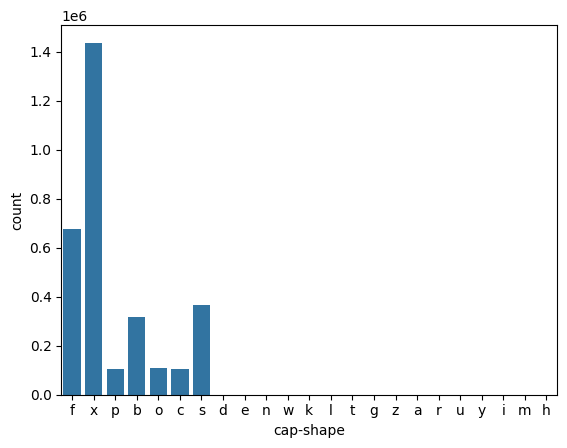

             cap-surface      Ratio
cap-surface                        
t                 460777  14.782969
s                 384970  12.350876
y                 327826  10.517542
h                 284460   9.126244
g                 263729   8.461137
d                 206832   6.635728
k                 128875   4.134657
e                 119712   3.840684
i                 113440   3.639461
w                 109840   3.523963
l                  44859   1.439198
n                     96   0.003080
f                     75   0.002406
p                     59   0.001893
u                     49   0.001572
a                     44   0.001412
m                     42   0.001347
o                     39   0.001251
r                     35   0.001123
x                     33   0.001059
c                     31   0.000995
b                     18   0.000577
z                      8   0.000257
##########################################


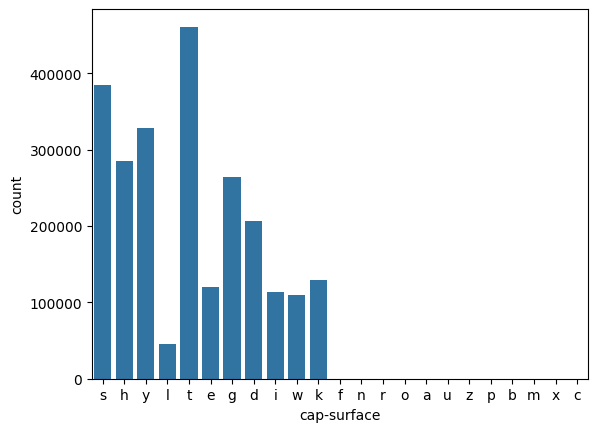

           cap-color      Ratio
cap-color                      
n            1359542  43.617773
y             386627  12.404037
w             379442  12.173522
g             210825   6.763834
e             197290   6.329595
o             178847   5.737894
p              91838   2.946411
r              78236   2.510022
u              73172   2.347555
b              61313   1.967086
k              59888   1.921369
l              39558   1.269127
f                 53   0.001700
d                 48   0.001540
s                 39   0.001251
a                 30   0.000962
t                 26   0.000834
h                 22   0.000706
c                 14   0.000449
x                 14   0.000449
m                 14   0.000449
i                 13   0.000417
z                 10   0.000321
##########################################


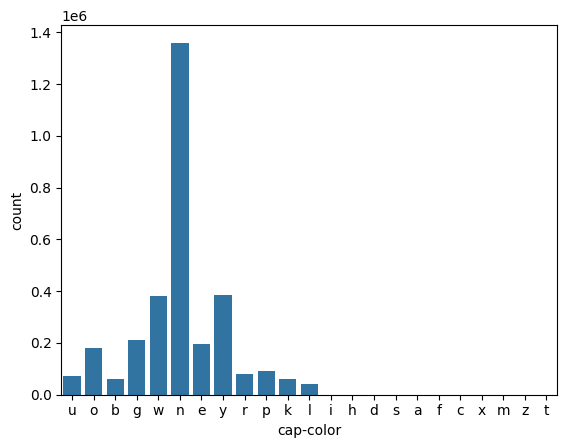

                      does-bruise-or-bleed      Ratio
does-bruise-or-bleed                                 
f                                  2569743  82.444284
t                                   547085  17.551962
w                                       14   0.000449
c                                       11   0.000353
h                                        9   0.000289
y                                        7   0.000225
a                                        7   0.000225
x                                        7   0.000225
b                                        7   0.000225
s                                        6   0.000192
k                                        6   0.000192
p                                        4   0.000128
l                                        4   0.000128
d                                        4   0.000128
e                                        4   0.000128
g                                        3   0.000096
o                           

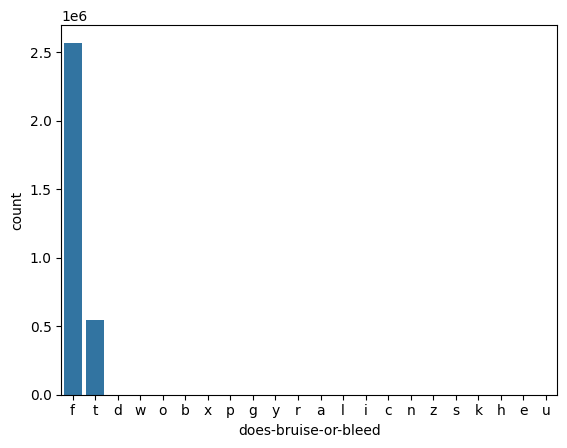

                 gill-attachment      Ratio
gill-attachment                            
a                         646034  20.726513
d                         589236  18.904280
x                         360878  11.577939
e                         301858   9.684419
s                         295439   9.478480
p                         279110   8.954601
f                         119953   3.848416
c                             74   0.002374
u                             56   0.001797
w                             37   0.001187
t                             36   0.001155
k                             33   0.001059
y                             28   0.000898
i                             25   0.000802
m                             22   0.000706
g                             22   0.000706
b                             21   0.000674
n                             20   0.000642
o                             18   0.000577
h                             18   0.000577
l                             16

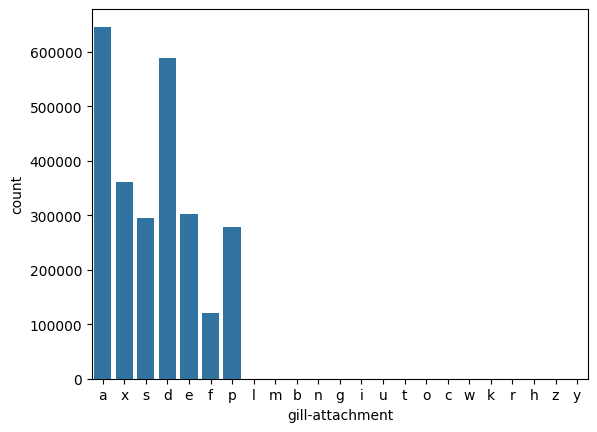

              gill-spacing      Ratio
gill-spacing                         
c                  1331054  42.703801
d                   407932  13.087558
f                   119380   3.830032
e                       24   0.000770
a                       17   0.000545
s                       16   0.000513
b                       12   0.000385
x                        8   0.000257
t                        8   0.000257
p                        7   0.000225
k                        4   0.000128
g                        4   0.000128
h                        3   0.000096
l                        3   0.000096
y                        2   0.000064
r                        2   0.000064
i                        1   0.000032
w                        1   0.000032
n                        1   0.000032
##########################################


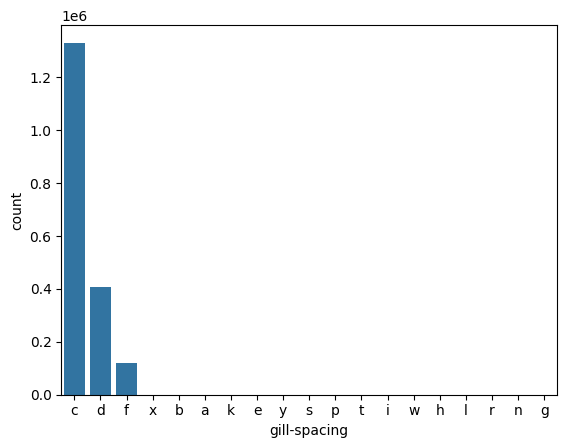

            gill-color      Ratio
gill-color                       
w               931538  29.886251
n               543386  17.433288
y               469464  15.061671
p               343626  11.024449
g               212164   6.806793
o               157119   5.040801
k               127970   4.105623
f               119694   3.840106
r                62799   2.014761
e                56047   1.798139
b                47247   1.515811
u                45399   1.456522
l                   55   0.001765
d                   54   0.001732
t                   54   0.001732
s                   46   0.001476
x                   35   0.001123
c                   31   0.000995
a                   28   0.000898
h                   24   0.000770
z                   16   0.000513
m                   16   0.000513
i                    9   0.000289
##########################################


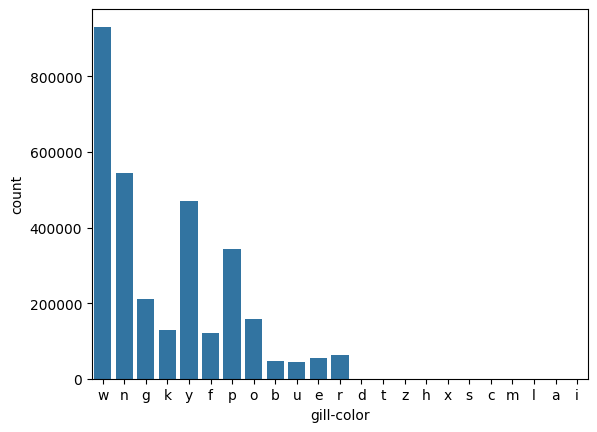

           stem-root     Ratio
stem-root                     
b             165801  5.319343
s             116946  3.751943
r              47803  1.533649
c              28592  0.917308
f                597  0.019153
d                 24  0.000770
y                 14  0.000449
g                 12  0.000385
w                 12  0.000385
p                 12  0.000385
k                 11  0.000353
t                 10  0.000321
n                 10  0.000321
l                 10  0.000321
x                  9  0.000289
u                  8  0.000257
i                  8  0.000257
a                  7  0.000225
e                  6  0.000192
o                  5  0.000160
m                  4  0.000128
h                  4  0.000128
z                  2  0.000064
##########################################


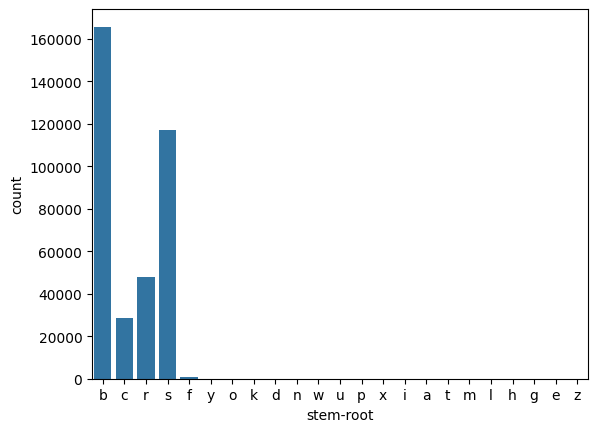

              stem-surface      Ratio
stem-surface                         
s                   327610  10.510612
y                   255500   8.197129
i                   224346   7.197625
t                   147974   4.747405
g                    78080   2.505017
k                    73383   2.354325
h                    28283   0.907395
f                      512   0.016426
w                       49   0.001572
d                       48   0.001540
e                       36   0.001155
n                       34   0.001091
x                       26   0.000834
b                       23   0.000738
c                       22   0.000706
l                       20   0.000642
p                       20   0.000642
r                       20   0.000642
u                       16   0.000513
o                       15   0.000481
a                       11   0.000353
m                        7   0.000225
z                        2   0.000064
##########################################


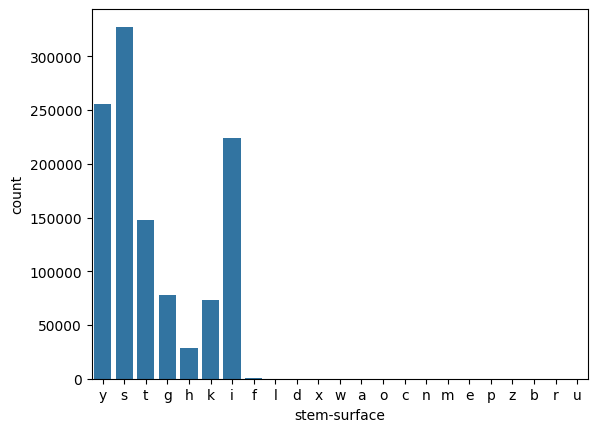

            stem-color      Ratio
stem-color                       
w              1196637  38.391342
n              1003464  32.193831
y               373971  11.997998
g               132019   4.235525
o               111541   3.578536
e               103373   3.316485
u                67017   2.150086
p                54690   1.754603
k                33676   1.080417
r                22329   0.716375
l                 9994   0.320634
b                 7365   0.236289
f                  573   0.018383
s                   51   0.001636
t                   40   0.001283
a                   36   0.001155
x                   20   0.000642
i                   19   0.000610
d                   16   0.000513
h                   12   0.000385
m                   11   0.000353
c                    7   0.000225
z                    6   0.000192
##########################################


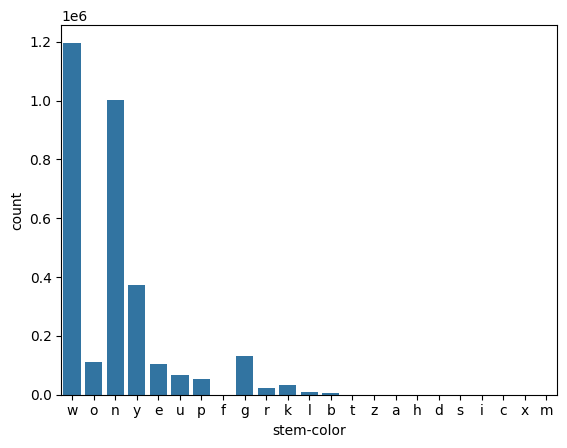

           veil-type     Ratio
veil-type                     
u             159373  5.113116
w                 11  0.000353
a                  9  0.000289
e                  8  0.000257
f                  8  0.000257
c                  5  0.000160
b                  5  0.000160
g                  4  0.000128
y                  4  0.000128
k                  4  0.000128
s                  3  0.000096
n                  3  0.000096
i                  2  0.000064
d                  2  0.000064
h                  2  0.000064
p                  2  0.000064
r                  2  0.000064
t                  1  0.000032
l                  1  0.000032
##########################################


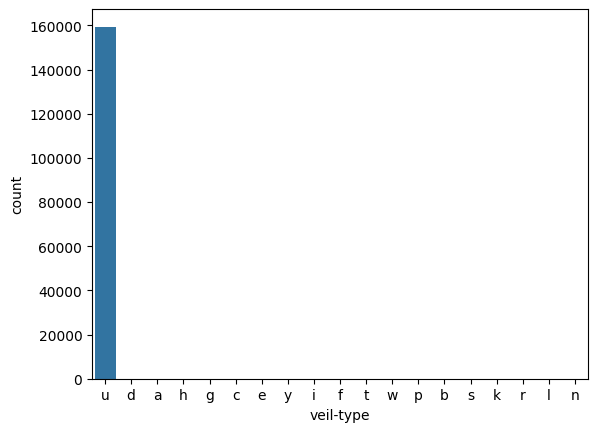

            veil-color     Ratio
veil-color                      
w               279070  8.953318
y                30473  0.977656
n                30039  0.963732
u                14026  0.449992
k                13080  0.419642
e                 9169  0.294166
g                   30  0.000962
p                   23  0.000738
r                   14  0.000449
o                   13  0.000417
s                   11  0.000353
t                    7  0.000225
a                    7  0.000225
i                    6  0.000192
d                    6  0.000192
h                    5  0.000160
f                    4  0.000128
c                    4  0.000128
l                    4  0.000128
b                    3  0.000096
z                    1  0.000032
##########################################


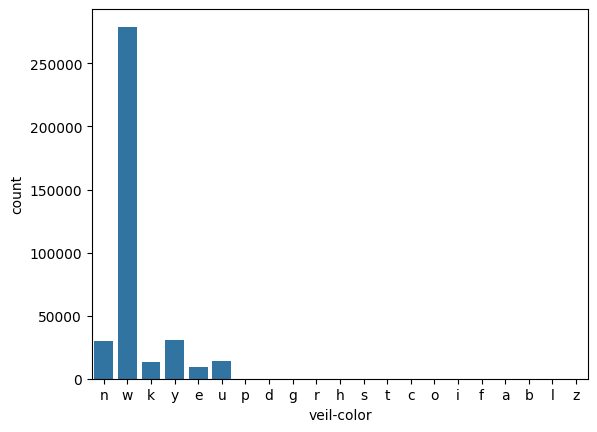

          has-ring      Ratio
has-ring                     
f          2368820  75.998133
t           747982  23.997279
r               16   0.000513
h               13   0.000417
l               11   0.000353
s               11   0.000353
p               11   0.000353
c               11   0.000353
g                8   0.000257
e                6   0.000192
z                6   0.000192
x                5   0.000160
m                4   0.000128
y                3   0.000096
d                3   0.000096
k                2   0.000064
o                2   0.000064
n                2   0.000064
i                1   0.000032
w                1   0.000032
a                1   0.000032
##########################################


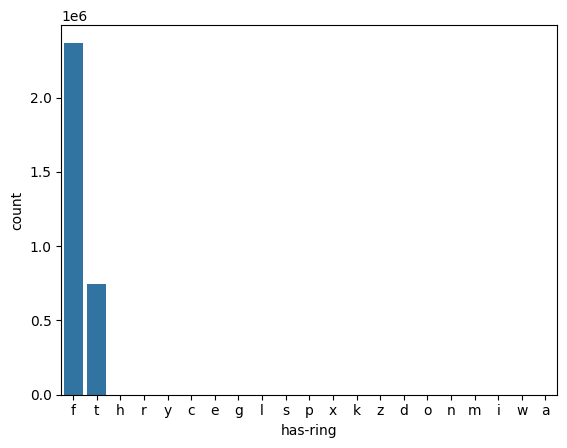

           ring-type      Ratio
ring-type                      
f            2477170  79.474293
e             120006   3.850116
z             113780   3.650369
l              73443   2.356249
r              67909   2.178704
p              67678   2.171293
g              63687   2.043251
m               3992   0.128074
t                 98   0.003144
d                 37   0.001187
n                 34   0.001091
x                 32   0.001027
b                 29   0.000930
y                 25   0.000802
s                 18   0.000577
k                 18   0.000577
a                 16   0.000513
h                 15   0.000481
w                 14   0.000449
u                 13   0.000417
c                 11   0.000353
o                  9   0.000289
i                  4   0.000128
##########################################


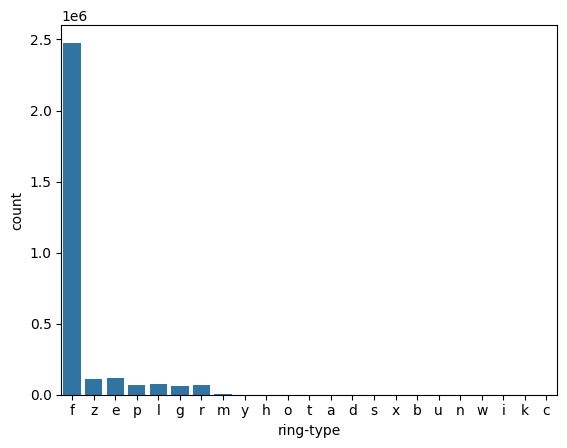

                   spore-print-color     Ratio
spore-print-color                             
k                             107310  3.442794
p                              68237  2.189227
w                              50173  1.609685
n                              22646  0.726545
r                               7975  0.255860
u                               7256  0.232792
g                               3492  0.112033
y                                 36  0.001155
s                                 21  0.000674
c                                 16  0.000513
f                                 14  0.000449
e                                 14  0.000449
t                                 13  0.000417
a                                 13  0.000417
d                                  9  0.000289
l                                  8  0.000257
b                                  5  0.000160
m                                  4  0.000128
o                                  3  0.000096
h            

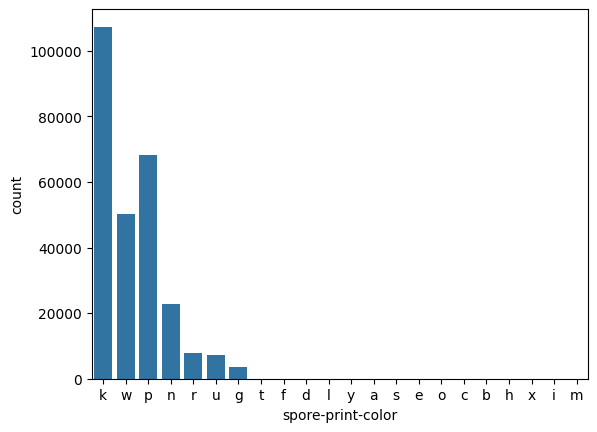

         habitat      Ratio
habitat                    
d        2177573  69.862413
g         454908  14.594675
l         171892   5.514759
m         150969   4.843493
h         120137   3.854319
w          18530   0.594492
p          17180   0.551181
u           5264   0.168883
e             55   0.001765
s             52   0.001668
n             41   0.001315
t             40   0.001283
r             38   0.001219
a             34   0.001091
y             34   0.001091
k             31   0.000995
c             26   0.000834
b             18   0.000577
o             12   0.000385
f             11   0.000353
i              7   0.000225
z              5   0.000160
x              5   0.000160
##########################################


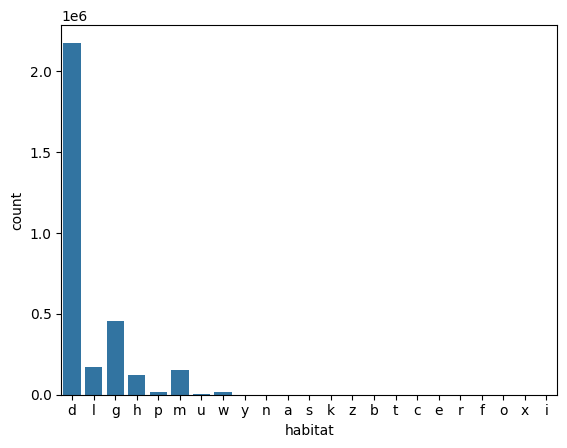

         season      Ratio
season                    
a       1543321  49.513899
u       1153588  37.010214
w        278189   8.925053
s        141847   4.550834
##########################################


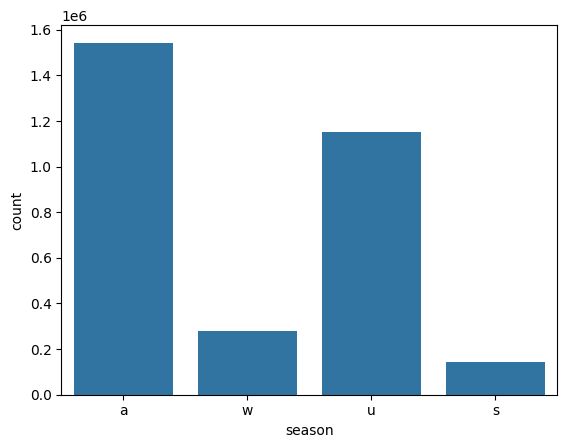

In [24]:
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
            
for col in cat_cols:
    cat_summary(df, col, True)


In [25]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "class", col)

           TARGET_MEAN
cap-shape             
a             0.500000
b             0.773037
c             0.542777
d             0.600000
e             0.350000
f             0.511944
g             0.558824
h             0.500000
i             0.785714
k             0.769231
l             0.238095
m             0.500000
n             0.512195
o             0.674810
p             0.459403
r             0.656250
s             0.549457
t             0.722222
u             0.592593
w             0.500000
x             0.510166
y             0.636364
z             1.000000


             TARGET_MEAN
cap-surface             
a               0.681818
b               0.388889
c               0.645161
d               0.587883
e               0.478432
f               0.613333
g               0.597185
h               0.470129
i               0.821915
k               0.901556
l               0.428810
m               0.428571
n               0.562500
o               0.794872
p               0.72881

In [26]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    3.116941e+06
mean     6.309848e+00
std      4.657931e+00
min      3.000000e-02
5%       1.340000e+00
10%      1.690000e+00
20%      2.990000e+00
30%      3.650000e+00
40%      4.490000e+00
50%      5.750000e+00
60%      6.720000e+00
70%      7.690000e+00
80%      8.920000e+00
90%      1.100000e+01
95%      1.323000e+01
99%      1.886000e+01
max      8.067000e+01
Name: cap-diameter, dtype: float64


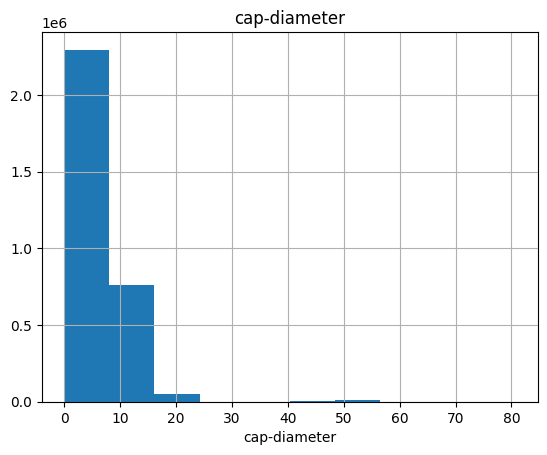

count    3.116945e+06
mean     6.348333e+00
std      2.699755e+00
min      0.000000e+00
5%       3.160000e+00
10%      3.610000e+00
20%      4.400000e+00
30%      4.910000e+00
40%      5.380000e+00
50%      5.880000e+00
60%      6.300000e+00
70%      7.020000e+00
80%      7.960000e+00
90%      9.590000e+00
95%      1.120000e+01
99%      1.666000e+01
max      8.872000e+01
Name: stem-height, dtype: float64


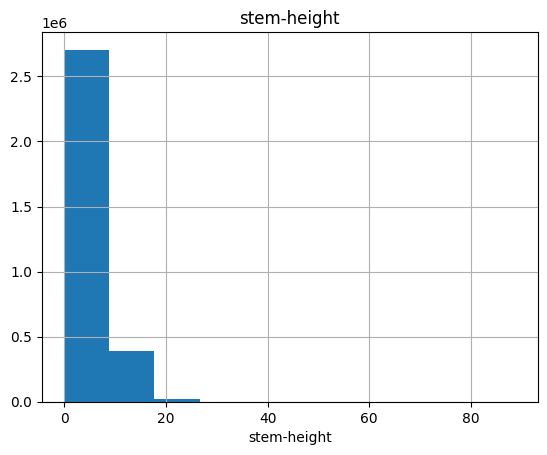

count    3.116945e+06
mean     1.115379e+01
std      8.095477e+00
min      0.000000e+00
5%       1.580000e+00
10%      2.470000e+00
20%      3.600000e+00
30%      5.910000e+00
40%      7.220000e+00
50%      9.650000e+00
60%      1.217000e+01
70%      1.415000e+01
80%      1.712000e+01
90%      2.251000e+01
95%      2.649000e+01
99%      3.544000e+01
max      1.029000e+02
Name: stem-width, dtype: float64


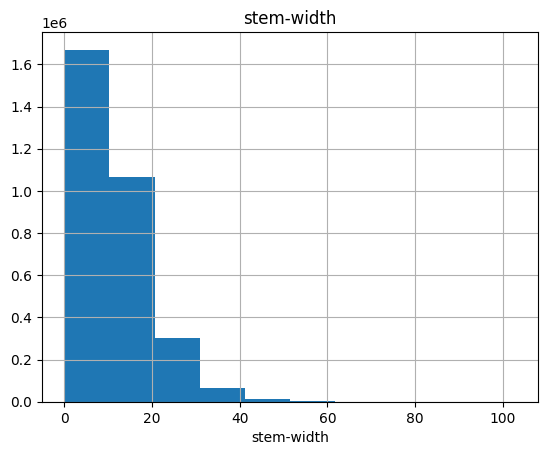

In [27]:
for col in num_cols:
    num_summary(df, col, plot=True)